# Plot data from Rigol DS1054Z scope

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

### Define plot mode. 
Interactive mode is helpful for visuallizing the program execution

In [2]:
#%matplotlib widget

### Define files to read

A helpful discussion on getting .csv files into Panda:
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

In [3]:
str_file = 'test010_000.csv'
df1 = pd.read_csv(str_file, delimiter=',', 
                  usecols=[0,1], skiprows=1, 
                  dtype={'Sequence': np.int32, 'Volt': np.float64})

df1_meta = pd.read_csv(str_file, delimiter=',', 
                  usecols=[4], skiprows=0, nrows=1, 
                  dtype={'deltaT': np.float64})
df1_meta.columns = ['deltaT']

In [4]:
str_file = 'test010_005.csv'
df2 = pd.read_csv(str_file, delimiter=',', 
                  usecols=[0,1], skiprows=1, 
                  dtype={'Sequence': np.int32, 'Volt': np.float64})

df2_meta = pd.read_csv(str_file, delimiter=',', 
                  usecols=[4], skiprows=0, nrows=1, 
                  dtype={'deltaT': np.float64})
df2_meta.columns = ['deltaT']

#### Signal features

In [5]:
# time series
i_ns = len(df1.Volt)
d_t = np.linspace(0,(i_ns-1), i_ns)
d_t1 = df1_meta.deltaT[0] * d_t
d_t2 = df2_meta.deltaT[0] * d_t

# Peak to peak estimation
d_pkpk1 = np.max(df1.Volt) - np.min(df1.Volt)
d_pkpk2 = np.max(df2.Volt) - np.min(df2.Volt)

### Plot the files

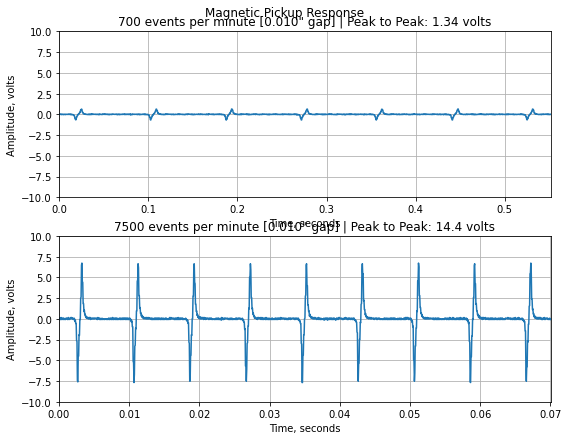

In [7]:
fig, ax = plt.subplots(figsize=(8.0, 9.0), nrows = 2)
fig.suptitle('Magnetic Pickup Response')
ax[0].plot(d_t1, df1.Volt)
ax[0].set_title('700 events per minute [0.010" gap] | Peak to Peak: ' 
                + '%0.2f' % d_pkpk1 + ' volts' )
ax[0].set_xlabel('Time, seconds')
ax[0].set_xlim([d_t1[0], d_t1[i_ns-1]])
ax[0].set_ylabel('Amplitude, volts')
ax[0].set_ylim([-10., 10.])
ax[0].grid()

ax[1].plot(d_t2, df2.Volt)
ax[1].set_title('7500 events per minute [0.010" gap] | Peak to Peak: ' 
                + '%0.1f' % d_pkpk2 + ' volts' )
ax[1].set_xlabel('Time, seconds')
ax[1].set_xlim([d_t2[0], d_t2[i_ns-1]])
ax[1].set_ylabel('Amplitude, volts')
ax[1].set_ylim([-10., 10.])
ax[1].grid()

plt.tight_layout()
figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig("0.38 Pickup gap 10 mils.pdf")
plt.show()